In [396]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,cross_validation,ensemble
import itertools
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.backend as K
import keras

In [319]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('cell.csv',parse_dates=['period_start'],index_col='period_start',date_parser=dateparse)

In [320]:
data.head()

,ecell_int_id,EUtranCellFDDId,timeslice_id,CellAvailability,RrcConnEstabSuccRate,S1SigConnEstabSuccRate,ErabEstabSuccessRate,InitialErabEstabSuccessRate,AvgNumRrcConnectedUsers,OutgoingHO,...,DlRadioUtilization,UlRadioUtilization,DlPdcpLatency,DlMacLatency,DlRlcAckFailRate,UlRlcAckFailRate,RachSuccRate,NumRrcConnEstabAttReatt,IncomingHO,target
period_start,,,,,,,,,,,,,,,,,,,,,
2017-11-11 00:00:00,536974528,L21-MD0447-1B,23,100.0,100.0,100.0,100.0,100.0,0.005556,0.0,...,5.0,5.0,0.000000,13.294118,0.0,0.0,23.076923,0.0,0.0,0.0
2017-11-11 01:00:00,536974528,L21-MD0447-1B,22,100.0,100.0,100.0,100.0,100.0,0.009722,0.0,...,5.0,5.0,6.692308,5.682540,0.0,0.0,22.580645,0.0,0.0,0.0
2017-11-11 02:00:00,536974528,L21-MD0447-1B,24,100.0,100.0,100.0,100.0,100.0,0.000000,0.0,...,5.0,5.0,0.000000,2.000000,0.0,0.0,17.857143,0.0,0.0,0.0
2017-11-11 03:00:00,536974528,L21-MD0447-1B,25,100.0,100.0,100.0,0.0,0.0,0.000000,0.0,...,5.0,5.0,0.000000,2.000000,0.0,0.0,10.714286,0.0,0.0,0.0
2017-11-11 04:00:00,536974528,L21-MD0447-1B,16,100.0,100.0,100.0,0.0,0.0,0.000000,0.0,...,5.0,5.0,0.000000,6.000000,0.0,0.0,9.090909,0.0,0.0,0.0


In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1272 entries, 2017-11-11 00:00:00 to 2018-01-03 00:00:00
Data columns (total 29 columns):
ecell_int_id                   1272 non-null int64
EUtranCellFDDId                1272 non-null object
timeslice_id                   1272 non-null int64
CellAvailability               1272 non-null float64
RrcConnEstabSuccRate           1272 non-null float64
S1SigConnEstabSuccRate         1272 non-null float64
ErabEstabSuccessRate           1272 non-null float64
InitialErabEstabSuccessRate    1272 non-null float64
AvgNumRrcConnectedUsers        1272 non-null float64
OutgoingHO                     1272 non-null float64
DlTraffic                      1272 non-null float64
UlTraffic                      1272 non-null float64
DropsDueToUeLost               1272 non-null float64
DlAvgNumActiveUe               1272 non-null float64
UlAvgNumActiveUe               1272 non-null float64
DlSchedulerActivityRate        1272 non-null float64
UlSchedulerAct

In [322]:
data.describe()

,ecell_int_id,timeslice_id,CellAvailability,RrcConnEstabSuccRate,S1SigConnEstabSuccRate,ErabEstabSuccessRate,InitialErabEstabSuccessRate,AvgNumRrcConnectedUsers,OutgoingHO,DlTraffic,...,DlRadioUtilization,UlRadioUtilization,DlPdcpLatency,DlMacLatency,DlRlcAckFailRate,UlRlcAckFailRate,RachSuccRate,NumRrcConnEstabAttReatt,IncomingHO,target
count,1272.0,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.00000,1272.000000,...,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.0
mean,536974528.0,13.235063,99.212548,98.395699,98.407423,86.482055,86.429901,0.025142,7.85456,0.012921,...,4.978072,4.968553,4.677456,5.905360,0.562376,0.474798,32.203165,0.091981,1.551101,0.0
std,0.0,7.215396,7.575556,12.447714,12.453983,34.106085,34.092122,0.062746,6.89725,0.102003,...,0.412500,0.395432,5.040892,3.866654,1.445504,2.462694,16.912454,0.368122,2.256676,0.0
min,536974528.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,536974528.0,7.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.001389,2.00000,0.000003,...,5.000000,5.000000,3.000000,3.470600,0.000000,0.000000,18.494152,0.000000,0.000000,0.0
50%,536974528.0,13.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.006944,7.00000,0.000169,...,5.000000,5.000000,4.314379,5.274295,0.000000,0.000000,31.339286,0.000000,1.000000,0.0
75%,536974528.0,19.250000,100.000000,100.000000,100.000000,100.000000,100.000000,0.020833,12.00000,0.001866,...,5.000000,5.000000,5.480317,7.292279,0.469678,0.204638,45.113852,0.000000,2.000000,0.0
max,536974528.0,25.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.981944,46.00000,3.260157,...,8.666667,5.000000,91.142857,44.666667,15.463918,44.971537,100.000000,5.000000,30.000000,0.0


# 查找时间缺失的日期

只有2017年11月15日这一天的时间是不连续的，少了早上8点的数据，按照前后两小时的平均值将它补全

In [323]:
date_rng = pd.date_range(start='2017-11-11', end='2018-01-02')
missing_date = [] 
for date in date_rng:
    str_date = date.strftime('%Y/%m/%d')
    if len(data[str_date]) != 24:
        missing_date.append(str_date)
missing_date

['2017/11/15']

In [324]:
data['2017-11-15']

,ecell_int_id,EUtranCellFDDId,timeslice_id,CellAvailability,RrcConnEstabSuccRate,S1SigConnEstabSuccRate,ErabEstabSuccessRate,InitialErabEstabSuccessRate,AvgNumRrcConnectedUsers,OutgoingHO,...,DlRadioUtilization,UlRadioUtilization,DlPdcpLatency,DlMacLatency,DlRlcAckFailRate,UlRlcAckFailRate,RachSuccRate,NumRrcConnEstabAttReatt,IncomingHO,target
period_start,,,,,,,,,,,,,,,,,,,,,
2017-11-15 00:00:00,536974528,L21-MD0447-1B,25,50.555556,100.0,100.0,100.000000,100.000000,0.002778,1.0,...,5.0,5.0,27.000000,7.565217,0.000000,0.000000,100.000000,0.0,0.0,0.0
2017-11-15 01:00:00,536974528,L21-MD0447-1B,19,50.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-11-15 02:00:00,536974528,L21-MD0447-1B,18,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-11-15 03:00:00,536974528,L21-MD0447-1B,23,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-11-15 04:00:00,536974528,L21-MD0447-1B,22,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-11-15 05:00:00,536974528,L21-MD0447-1B,21,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-11-15 06:00:00,536974528,L21-MD0447-1B,20,25.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,5.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-11-15 07:00:00,536974528,L21-MD0447-1B,24,75.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-11-15 09:00:00,536974528,L21-MD0447-1B,15,100.000000,100.0,100.0,100.000000,100.000000,0.008333,5.0,...,5.0,5.0,3.636364,5.565217,0.000000,0.000000,50.000000,0.0,1.0,0.0


In [325]:
insert_date = datetime.strptime("2017-11-15 08:00:00", '%Y-%m-%d %H:%M:%S')
data = data.append(pd.DataFrame(index=[insert_date]))
data.sort_index(inplace=True)

In [327]:
data = data.interpolate()

# target

由图可知，数据的分布是非常不均衡的，正常数据有1268个，而异常数据只有5个

In [329]:
aval = data[data['CellAvailability'] == 0].index
rrc = data[data['RrcConnEstabSuccRate'] == 0] .index 
sls = data[data['S1SigConnEstabSuccRate'] == 0] .index
era = data[data['ErabEstabSuccessRate'] == 0] .index
abnormal = aval & rrc & sls & era
target = [i - dt.timedelta(minutes=60) for i in abnormal]
for i in target:
    data.target[data.index == i] = 1

/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


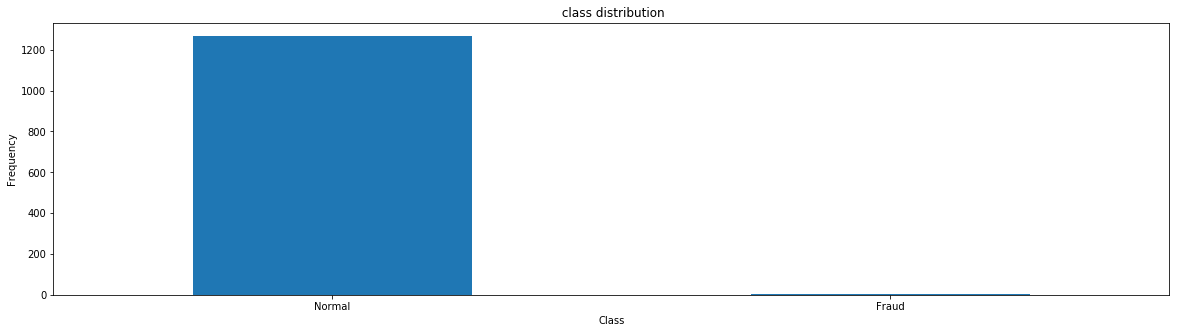

----------------------------------
Cell data has 5 Abnormal samples
Cell data has 1268 Normal samples


In [336]:
plt.figure(figsize=(20,5))
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title(" class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
print('----------------------------------')
print('Cell data has %d Abnormal samples' %len(data[data.target == 1]) )
print('Cell data has %d Normal samples' %len(data[data.target == 0]) )

# 特征处理

有5个特征与分类的相关性较高

|Variable Description|corelation|
|:----|-----|
| UlRadioUtilization | -0.62 |
| CellAvailability | -0.61 |
| DlRadioUtilization | -0.60 |
| S1SigConnEstabSuccRate | -0.40 |
| RrcConnEstabSuccRate | -0.39 |

In [338]:
#除去不需要的列：‘EUtranCellFDDId’，'ecell_int_id'，'timeslice_id'
data = data.drop(['EUtranCellFDDId','ecell_int_id','timeslice_id'], axis=1)

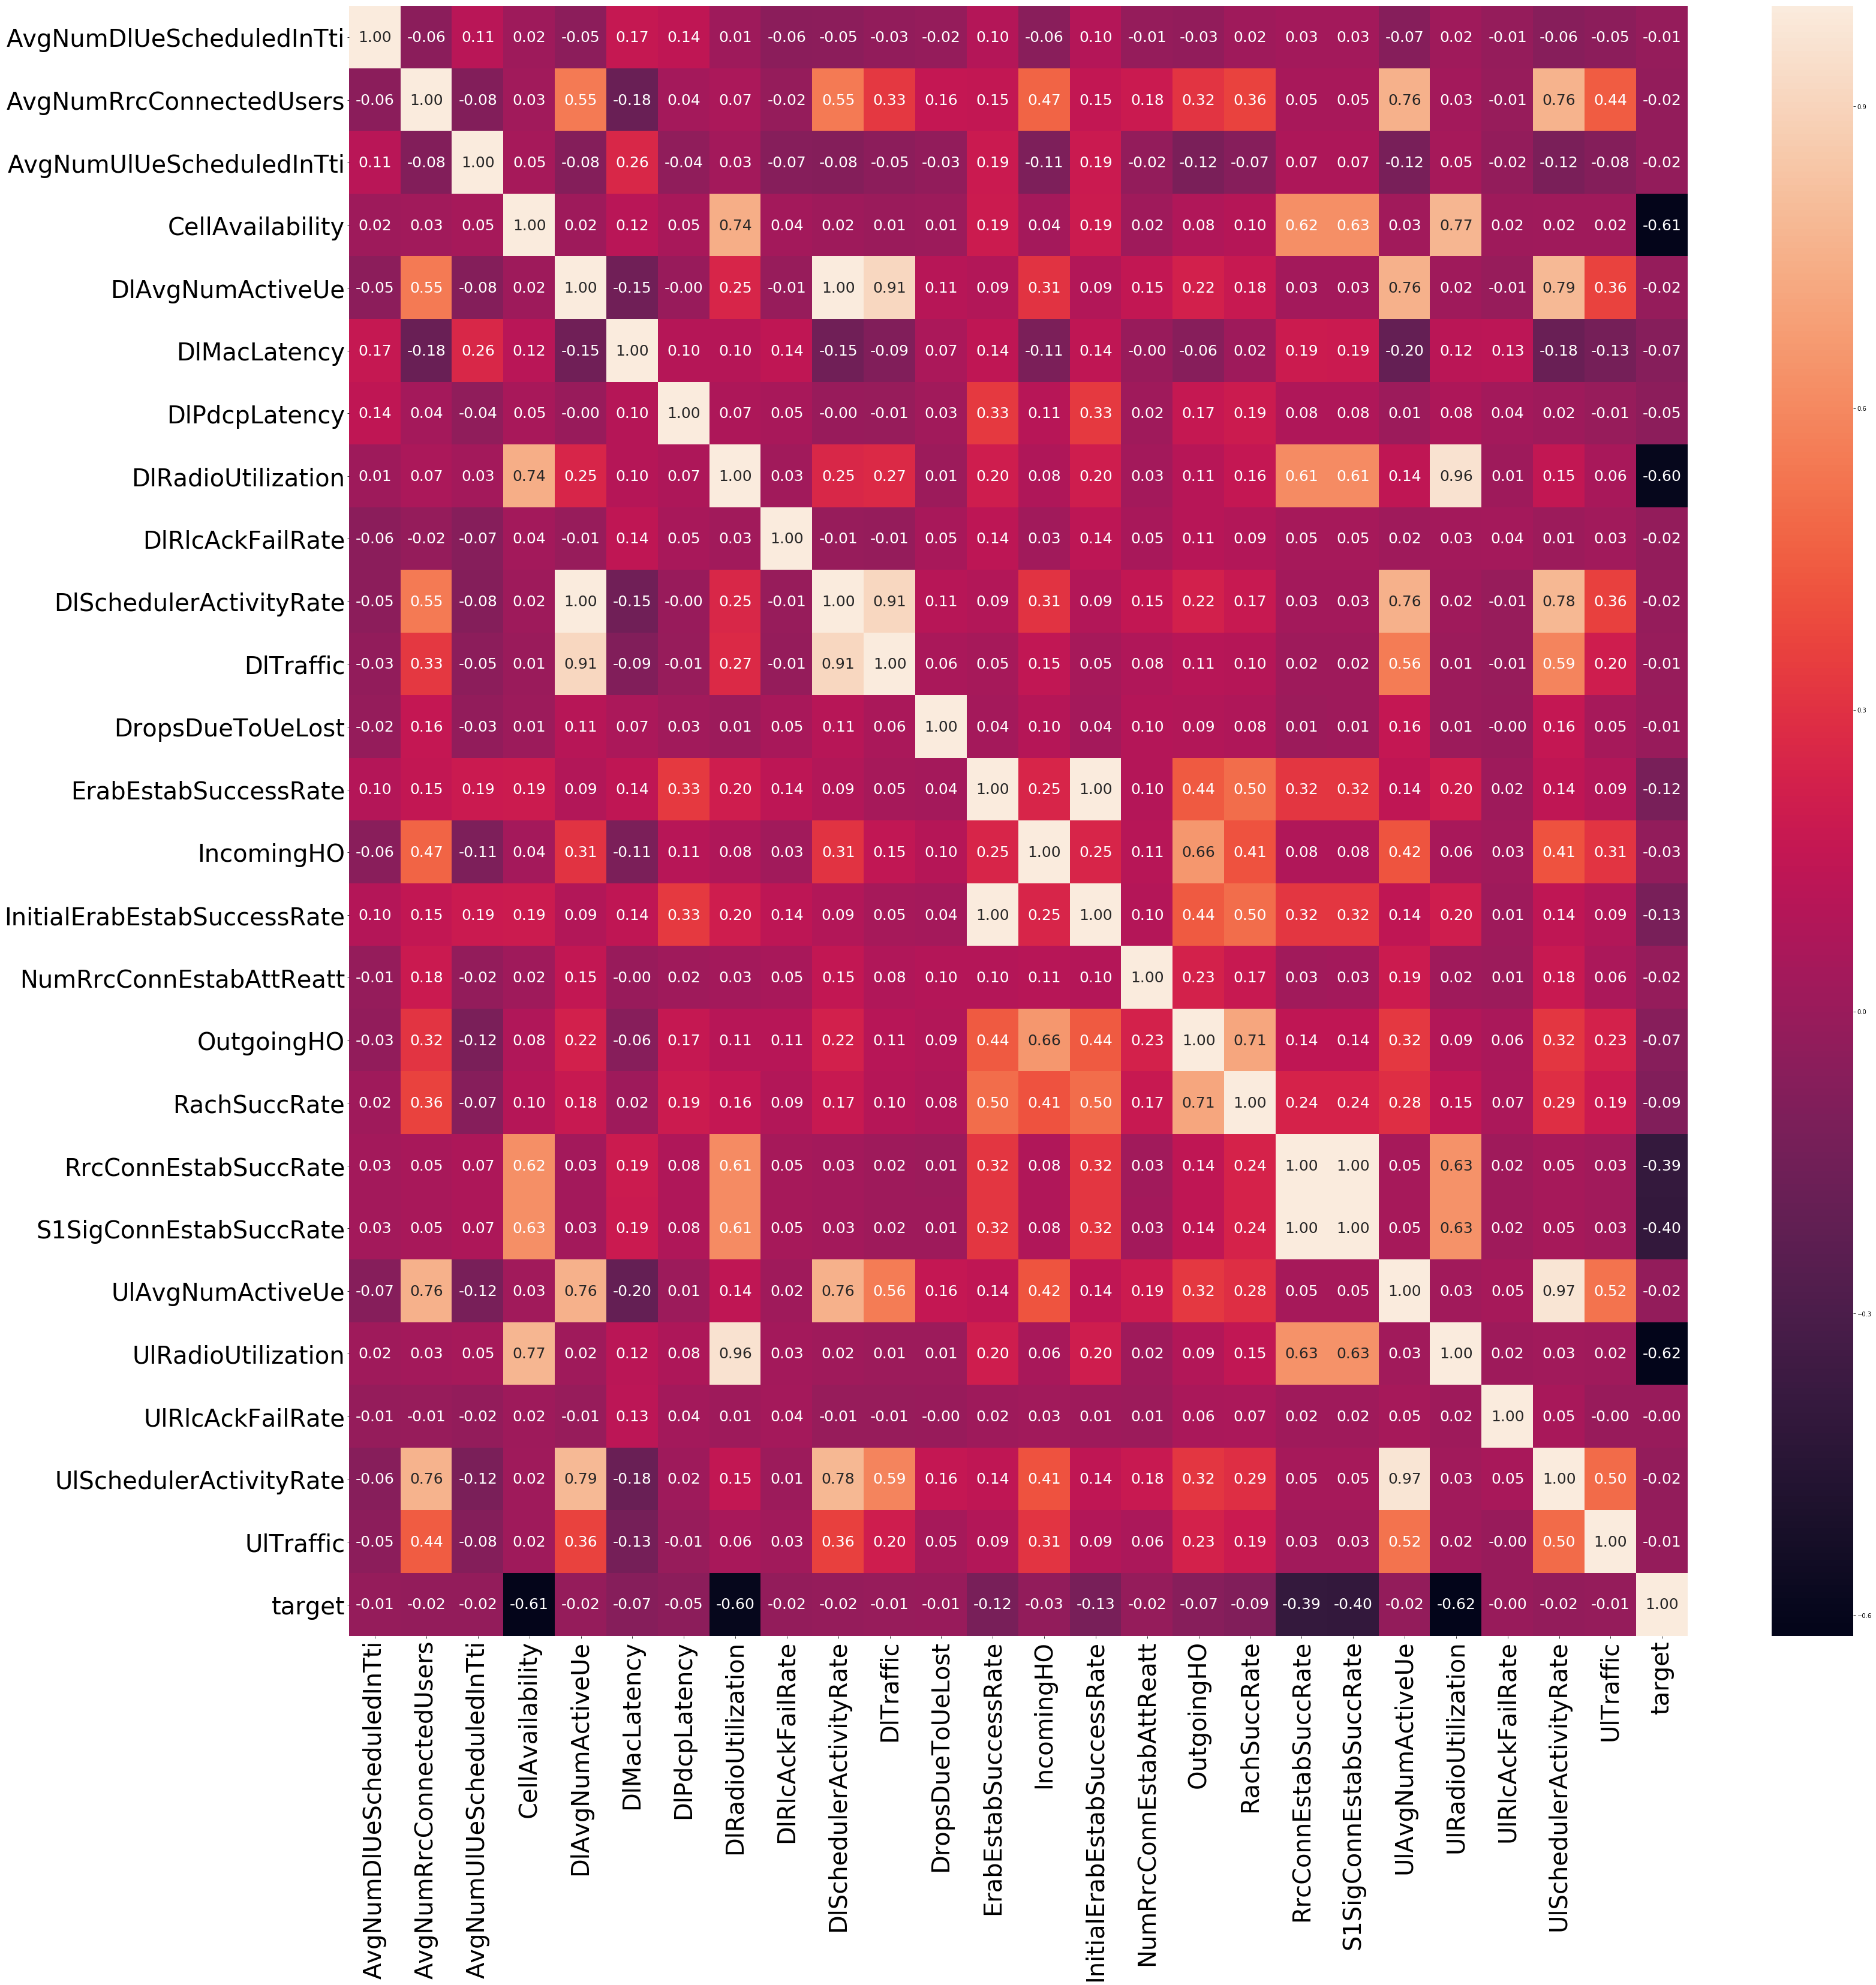

In [339]:
plt.figure(figsize=(50,50))
a = sns.heatmap(data.corr(),annot=True, fmt=".2f", annot_kws={"size": 25})
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels())
a.tick_params(labelsize=40)
plt.show()

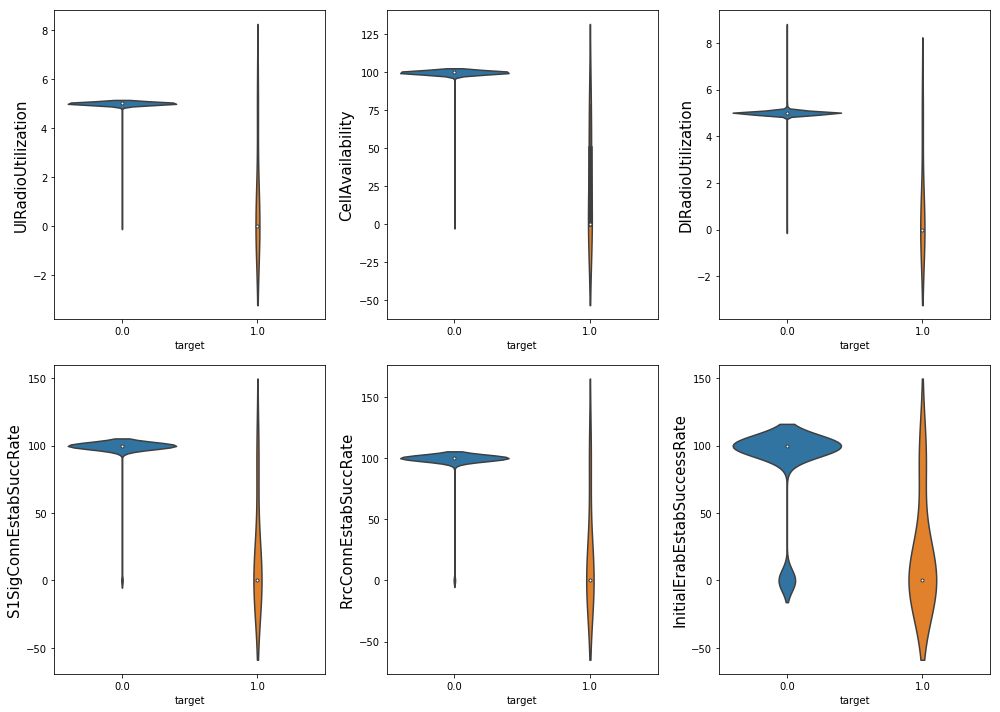

In [346]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(14,10), nrows=2, ncols=3)
sns.violinplot(x='target', y='UlRadioUtilization', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax1)
sns.violinplot(x='target', y='CellAvailability', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax2)
sns.violinplot(x='target', y='DlRadioUtilization', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax3)
sns.violinplot(x='target', y='S1SigConnEstabSuccRate', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax4)
sns.violinplot(x='target', y='RrcConnEstabSuccRate', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax5)
sns.violinplot(x='target', y='InitialErabEstabSuccessRate', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax6)
ax1.set_ylabel('UlRadioUtilization',fontsize = 15)
ax2.set_ylabel('CellAvailability',fontsize = 15)
ax3.set_ylabel('DlRadioUtilization',fontsize = 15)
ax4.set_ylabel('S1SigConnEstabSuccRate',fontsize = 15)
ax5.set_ylabel('RrcConnEstabSuccRate',fontsize = 15)
ax6.set_ylabel('InitialErabEstabSuccessRate',fontsize = 15)
plt.tight_layout()

# SMOTE过采样

In [372]:
X =  np.array(data.loc[:, data.columns != 'target'])
y = np.array(data.loc[:,data.columns == 'target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print('--------------------------------------------')
sm = SMOTE(random_state=2,k_neighbors=3,ratio=0.3)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print('--------------------------------------------')
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print('--------------------------------------------')
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [4]
Before OverSampling, counts of label '0': [950] 

--------------------------------------------
--------------------------------------------
After OverSampling, the shape of train_X: (1235, 25)
After OverSampling, the shape of train_y: (1235,) 

--------------------------------------------
After OverSampling, counts of label '1': 285
After OverSampling, counts of label '0': 950


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


# AdaBoostClassifier

In [353]:
#选择recall最高的模型
ada=ensemble.AdaBoostClassifier()
param_grid = {
          "n_estimators": [int(i) for i in np.linspace(10,100,10)],
             "learning_rate":np.linspace(0.1,2,20)}
clf = GridSearchCV(ada, param_grid, cv=5, verbose=5,scoring='recall')
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV]  learning_rate=0.1, n_estimators=10, score=0.9824561403508771, total=   0.0s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] .... learning_rate=0.1, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] .... learning_rate=0.1, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV]  learning_rate=0.1, n_estimators=10, score=0.9824561403508771, total=   0.0s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] .... learning_rate=0.1, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=0.1, n_estimators=20 ..............................
[CV]  learning_rate=0.1, n_estimators=20, score=0.9824561403508771, total=   0.0s
[CV] learning_rate=0.1, n_estimators=20 ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] .... learning_rate=0.1, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=0.1, n_estimators=20 ..............................
[CV] .... learning_rate=0.1, n_estimators=20, score=1.0, total=   0.1s
[CV] learning_rate=0.1, n_estimators=20 ..............................
[CV]  learning_rate=0.1, n_estimators=20, score=0.9824561403508771, total=   0.0s
[CV] learning_rate=0.1, n_estimators=20 ..............................
[CV] .... learning_rate=0.1, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=0.1, n_estimators=30 ..............................
[CV]  learning_rate=0.1, n_estimators=30, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.1, n_estimators=30 ..............................
[CV] .... learning_rate=0.1, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=0.1, n_estimators=30 ..............................
[CV] .... learning_rate=0.1, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=0.1, n_estimators=30 ...............

[CV]  learning_rate=0.2, n_estimators=40, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.2, n_estimators=40 ..............................
[CV] .... learning_rate=0.2, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=0.2, n_estimators=40 ..............................
[CV] .... learning_rate=0.2, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=0.2, n_estimators=40 ..............................
[CV] .... learning_rate=0.2, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=0.2, n_estimators=40 ..............................
[CV] .... learning_rate=0.2, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=0.2, n_estimators=50 ..............................
[CV]  learning_rate=0.2, n_estimators=50, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.2, n_estimators=50 ..............................
[CV] .... learning_rate=0.2, n_estimators=50, score=1.0, total=   0.1s
[CV] learning_rate=0.2, n_estimators=50 ...............

[CV] .... learning_rate=0.3, n_estimators=50, score=1.0, total=   0.1s
[CV] learning_rate=0.3, n_estimators=60 ..............................
[CV]  learning_rate=0.3, n_estimators=60, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.3, n_estimators=60 ..............................
[CV] .... learning_rate=0.3, n_estimators=60, score=1.0, total=   0.1s
[CV] learning_rate=0.3, n_estimators=60 ..............................
[CV] .... learning_rate=0.3, n_estimators=60, score=1.0, total=   0.1s
[CV] learning_rate=0.3, n_estimators=60 ..............................
[CV] .... learning_rate=0.3, n_estimators=60, score=1.0, total=   0.1s
[CV] learning_rate=0.3, n_estimators=60 ..............................
[CV] .... learning_rate=0.3, n_estimators=60, score=1.0, total=   0.1s
[CV] learning_rate=0.3, n_estimators=70 ..............................
[CV]  learning_rate=0.3, n_estimators=70, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.3, n_estimators=70 ...............

[CV] .... learning_rate=0.4, n_estimators=70, score=1.0, total=   0.1s
[CV] learning_rate=0.4, n_estimators=70 ..............................
[CV] .... learning_rate=0.4, n_estimators=70, score=1.0, total=   0.1s
[CV] learning_rate=0.4, n_estimators=70 ..............................
[CV] .... learning_rate=0.4, n_estimators=70, score=1.0, total=   0.1s
[CV] learning_rate=0.4, n_estimators=80 ..............................
[CV]  learning_rate=0.4, n_estimators=80, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.4, n_estimators=80 ..............................
[CV] .... learning_rate=0.4, n_estimators=80, score=1.0, total=   0.2s
[CV] learning_rate=0.4, n_estimators=80 ..............................
[CV] .... learning_rate=0.4, n_estimators=80, score=1.0, total=   0.1s
[CV] learning_rate=0.4, n_estimators=80 ..............................
[CV] .... learning_rate=0.4, n_estimators=80, score=1.0, total=   0.1s
[CV] learning_rate=0.4, n_estimators=80 ..........................

[CV]  learning_rate=0.5, n_estimators=90, score=0.9824561403508771, total=   0.2s
[CV] learning_rate=0.5, n_estimators=90 ..............................
[CV] .... learning_rate=0.5, n_estimators=90, score=1.0, total=   0.2s
[CV] learning_rate=0.5, n_estimators=90 ..............................
[CV] .... learning_rate=0.5, n_estimators=90, score=1.0, total=   0.2s
[CV] learning_rate=0.5, n_estimators=90 ..............................
[CV] .... learning_rate=0.5, n_estimators=90, score=1.0, total=   0.2s
[CV] learning_rate=0.5, n_estimators=90 ..............................
[CV] .... learning_rate=0.5, n_estimators=90, score=1.0, total=   0.2s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV]  learning_rate=0.5, n_estimators=100, score=0.9824561403508771, total=   0.2s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] ... learning_rate=0.5, n_estimators=100, score=1.0, total=   0.2s
[CV] learning_rate=0.5, n_estimators=100 .............

[CV] ... learning_rate=0.6, n_estimators=100, score=1.0, total=   0.2s
[CV] learning_rate=0.6, n_estimators=100 .............................
[CV]  learning_rate=0.6, n_estimators=100, score=0.9824561403508771, total=   0.2s
[CV] learning_rate=0.6, n_estimators=100 .............................
[CV] ... learning_rate=0.6, n_estimators=100, score=1.0, total=   0.2s
[CV] learning_rate=0.7, n_estimators=10 ..............................
[CV]  learning_rate=0.7, n_estimators=10, score=0.9824561403508771, total=   0.0s
[CV] learning_rate=0.7, n_estimators=10 ..............................
[CV] .... learning_rate=0.7, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=0.7, n_estimators=10 ..............................
[CV] .... learning_rate=0.7, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=0.7, n_estimators=10 ..............................
[CV] .... learning_rate=0.7, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=0.7, n_estimators=10 ..............

[CV]  learning_rate=0.7999999999999999, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=0.7999999999999999, n_estimators=20 ...............
[CV]  learning_rate=0.7999999999999999, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=0.7999999999999999, n_estimators=20 ...............
[CV]  learning_rate=0.7999999999999999, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=0.7999999999999999, n_estimators=30 ...............
[CV]  learning_rate=0.7999999999999999, n_estimators=30, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.7999999999999999, n_estimators=30 ...............
[CV]  learning_rate=0.7999999999999999, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=0.7999999999999999, n_estimators=30 ...............
[CV]  learning_rate=0.7999999999999999, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=0.7999999999999999, n_estimators=30 ...............
[CV]  learning_rate=0.7999999999999999, n_estimators=30, score=1.0,

[CV]  learning_rate=0.8999999999999999, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=0.8999999999999999, n_estimators=30 ...............
[CV]  learning_rate=0.8999999999999999, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=0.8999999999999999, n_estimators=30 ...............
[CV]  learning_rate=0.8999999999999999, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=0.8999999999999999, n_estimators=30 ...............
[CV]  learning_rate=0.8999999999999999, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=0.8999999999999999, n_estimators=40 ...............
[CV]  learning_rate=0.8999999999999999, n_estimators=40, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.8999999999999999, n_estimators=40 ...............
[CV]  learning_rate=0.8999999999999999, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=0.8999999999999999, n_estimators=40 ...............
[CV]  learning_rate=0.8999999999999999, n_estimators=40, score=1.0,

[CV]  learning_rate=0.9999999999999999, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=0.9999999999999999, n_estimators=40 ...............
[CV]  learning_rate=0.9999999999999999, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=0.9999999999999999, n_estimators=40 ...............
[CV]  learning_rate=0.9999999999999999, n_estimators=40, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.9999999999999999, n_estimators=40 ...............
[CV]  learning_rate=0.9999999999999999, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=0.9999999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.9999999999999999, n_estimators=50, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=0.9999999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.9999999999999999, n_estimators=50, score=1.0, total=   0.1s
[CV] learning_rate=0.9999999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.9999999999999999, n_estimators

[CV]  learning_rate=1.0999999999999999, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=1.0999999999999999, n_estimators=50 ...............
[CV]  learning_rate=1.0999999999999999, n_estimators=50, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=1.0999999999999999, n_estimators=50 ...............
[CV]  learning_rate=1.0999999999999999, n_estimators=50, score=1.0, total=   0.1s
[CV] learning_rate=1.0999999999999999, n_estimators=50 ...............
[CV]  learning_rate=1.0999999999999999, n_estimators=50, score=1.0, total=   0.1s
[CV] learning_rate=1.0999999999999999, n_estimators=50 ...............
[CV]  learning_rate=1.0999999999999999, n_estimators=50, score=1.0, total=   0.1s
[CV] learning_rate=1.0999999999999999, n_estimators=50 ...............
[CV]  learning_rate=1.0999999999999999, n_estimators=50, score=1.0, total=   0.1s
[CV] learning_rate=1.0999999999999999, n_estimators=60 ...............
[CV]  learning_rate=1.0999999999999999, n_estimators=60, score=0.98

[CV]  learning_rate=1.2, n_estimators=60, score=0.9649122807017544, total=   0.1s
[CV] learning_rate=1.2, n_estimators=60 ..............................
[CV] .... learning_rate=1.2, n_estimators=60, score=1.0, total=   0.1s
[CV] learning_rate=1.2, n_estimators=60 ..............................
[CV] .... learning_rate=1.2, n_estimators=60, score=1.0, total=   0.1s
[CV] learning_rate=1.2, n_estimators=60 ..............................
[CV] .... learning_rate=1.2, n_estimators=60, score=1.0, total=   0.1s
[CV] learning_rate=1.2, n_estimators=60 ..............................
[CV] .... learning_rate=1.2, n_estimators=60, score=1.0, total=   0.1s
[CV] learning_rate=1.2, n_estimators=70 ..............................
[CV]  learning_rate=1.2, n_estimators=70, score=0.9649122807017544, total=   0.1s
[CV] learning_rate=1.2, n_estimators=70 ..............................
[CV] .... learning_rate=1.2, n_estimators=70, score=1.0, total=   0.1s
[CV] learning_rate=1.2, n_estimators=70 ...............

[CV] .... learning_rate=1.3, n_estimators=70, score=1.0, total=   0.1s
[CV] learning_rate=1.3, n_estimators=70 ..............................
[CV] .... learning_rate=1.3, n_estimators=70, score=1.0, total=   0.1s
[CV] learning_rate=1.3, n_estimators=70 ..............................
[CV] .... learning_rate=1.3, n_estimators=70, score=1.0, total=   0.1s
[CV] learning_rate=1.3, n_estimators=80 ..............................
[CV]  learning_rate=1.3, n_estimators=80, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=1.3, n_estimators=80 ..............................
[CV] .... learning_rate=1.3, n_estimators=80, score=1.0, total=   0.1s
[CV] learning_rate=1.3, n_estimators=80 ..............................
[CV] .... learning_rate=1.3, n_estimators=80, score=1.0, total=   0.1s
[CV] learning_rate=1.3, n_estimators=80 ..............................
[CV] .... learning_rate=1.3, n_estimators=80, score=1.0, total=   0.2s
[CV] learning_rate=1.3, n_estimators=80 ..........................

[CV] .... learning_rate=1.4, n_estimators=80, score=1.0, total=   0.1s
[CV] learning_rate=1.4, n_estimators=90 ..............................
[CV]  learning_rate=1.4, n_estimators=90, score=0.9649122807017544, total=   0.2s
[CV] learning_rate=1.4, n_estimators=90 ..............................
[CV] .... learning_rate=1.4, n_estimators=90, score=1.0, total=   0.2s
[CV] learning_rate=1.4, n_estimators=90 ..............................
[CV] .... learning_rate=1.4, n_estimators=90, score=1.0, total=   0.2s
[CV] learning_rate=1.4, n_estimators=90 ..............................
[CV] .... learning_rate=1.4, n_estimators=90, score=1.0, total=   0.2s
[CV] learning_rate=1.4, n_estimators=90 ..............................
[CV] .... learning_rate=1.4, n_estimators=90, score=1.0, total=   0.2s
[CV] learning_rate=1.4, n_estimators=100 .............................
[CV]  learning_rate=1.4, n_estimators=100, score=0.9649122807017544, total=   0.2s
[CV] learning_rate=1.4, n_estimators=100 .............

[CV] ... learning_rate=1.5, n_estimators=100, score=1.0, total=   0.2s
[CV] learning_rate=1.5, n_estimators=100 .............................
[CV] ... learning_rate=1.5, n_estimators=100, score=1.0, total=   0.2s
[CV] learning_rate=1.5, n_estimators=100 .............................
[CV] ... learning_rate=1.5, n_estimators=100, score=1.0, total=   0.2s
[CV] learning_rate=1.5, n_estimators=100 .............................
[CV] ... learning_rate=1.5, n_estimators=100, score=1.0, total=   0.2s
[CV] learning_rate=1.5999999999999999, n_estimators=10 ...............
[CV]  learning_rate=1.5999999999999999, n_estimators=10, score=0.9824561403508771, total=   0.0s
[CV] learning_rate=1.5999999999999999, n_estimators=10 ...............
[CV]  learning_rate=1.5999999999999999, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=1.5999999999999999, n_estimators=10 ...............
[CV]  learning_rate=1.5999999999999999, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=1.59999999

[CV]  learning_rate=1.7, n_estimators=10, score=0.9824561403508771, total=   0.0s
[CV] learning_rate=1.7, n_estimators=10 ..............................
[CV] .... learning_rate=1.7, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=1.7, n_estimators=10 ..............................
[CV] .... learning_rate=1.7, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=1.7, n_estimators=10 ..............................
[CV] .... learning_rate=1.7, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=1.7, n_estimators=10 ..............................
[CV] .... learning_rate=1.7, n_estimators=10, score=1.0, total=   0.0s
[CV] learning_rate=1.7, n_estimators=20 ..............................
[CV]  learning_rate=1.7, n_estimators=20, score=0.9824561403508771, total=   0.0s
[CV] learning_rate=1.7, n_estimators=20 ..............................
[CV] .... learning_rate=1.7, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=1.7, n_estimators=20 ...............

[CV] .... learning_rate=1.8, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=1.8, n_estimators=20 ..............................
[CV] .... learning_rate=1.8, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=1.8, n_estimators=20 ..............................
[CV] .... learning_rate=1.8, n_estimators=20, score=1.0, total=   0.0s
[CV] learning_rate=1.8, n_estimators=30 ..............................
[CV]  learning_rate=1.8, n_estimators=30, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=1.8, n_estimators=30 ..............................
[CV] .... learning_rate=1.8, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=1.8, n_estimators=30 ..............................
[CV] .... learning_rate=1.8, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=1.8, n_estimators=30 ..............................
[CV] .... learning_rate=1.8, n_estimators=30, score=1.0, total=   0.1s
[CV] learning_rate=1.8, n_estimators=30 ..........................

[CV]  learning_rate=1.9, n_estimators=40, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=1.9, n_estimators=40 ..............................
[CV] .... learning_rate=1.9, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=1.9, n_estimators=40 ..............................
[CV] .... learning_rate=1.9, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=1.9, n_estimators=40 ..............................
[CV] .... learning_rate=1.9, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=1.9, n_estimators=40 ..............................
[CV] .... learning_rate=1.9, n_estimators=40, score=1.0, total=   0.1s
[CV] learning_rate=1.9, n_estimators=50 ..............................
[CV]  learning_rate=1.9, n_estimators=50, score=0.9824561403508771, total=   0.1s
[CV] learning_rate=1.9, n_estimators=50 ..............................
[CV] .... learning_rate=1.9, n_estimators=50, score=1.0, total=   0.1s
[CV] learning_rate=1.9, n_estimators=50 ...............

[CV]  learning_rate=2.0, n_estimators=50, score=0.6842105263157895, total=   0.1s
[CV] learning_rate=2.0, n_estimators=50 ..............................
[CV]  learning_rate=2.0, n_estimators=50, score=0.6842105263157895, total=   0.1s
[CV] learning_rate=2.0, n_estimators=50 ..............................
[CV]  learning_rate=2.0, n_estimators=50, score=0.6785714285714286, total=   0.1s
[CV] learning_rate=2.0, n_estimators=60 ..............................
[CV]  learning_rate=2.0, n_estimators=60, score=0.5789473684210527, total=   0.1s
[CV] learning_rate=2.0, n_estimators=60 ..............................
[CV]  learning_rate=2.0, n_estimators=60, score=0.5087719298245614, total=   0.1s
[CV] learning_rate=2.0, n_estimators=60 ..............................
[CV]  learning_rate=2.0, n_estimators=60, score=0.6842105263157895, total=   0.1s
[CV] learning_rate=2.0, n_estimators=60 ..............................
[CV]  learning_rate=2.0, n_estimators=60, score=0.6842105263157895, total=   0.1s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=5)

In [354]:
clf.best_params_

{'learning_rate': 1.4, 'n_estimators': 60}

In [355]:
ada_best = ensemble.AdaBoostClassifier(learning_rate= 1.5999999999999999, n_estimators=30)
ada_best.fit(X_train_res, y_train_res.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.5999999999999999, n_estimators=30,
          random_state=None)

In [357]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    else:
        
   

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 100.0%


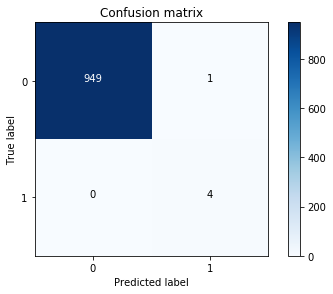

In [373]:
y_train_pre = ada_best.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 100.0%


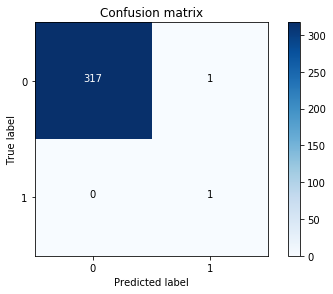

In [374]:
y_pre = ada_best.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

# Run the deep learning model: using keras MLP

尝试MLP,但最后结果不好

In [381]:
def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 200)               5200      
_________________________________________________________________
dropout_35 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_36 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 201       
Total params: 45,601
Trainable params: 45,601
Non-trainable params: 0
_________________________________________________________________
None
Train on 246 samples, validate on 989 samples
Epoch 1/100
 - 1s - loss: 0.5581 - acc: 0.7114 - getRecall: 0.0000e+00 - val_loss: 0.40

Epoch 54/100
 - 0s - loss: 0.0390 - acc: 0.9919 - getRecall: 0.0000e+00 - val_loss: 0.6213 - val_acc: 0.7139 - val_getRecall: 0.0000e+00
Epoch 55/100
 - 0s - loss: 0.0321 - acc: 0.9919 - getRecall: 0.0000e+00 - val_loss: 0.6210 - val_acc: 0.7139 - val_getRecall: 0.0000e+00
Epoch 56/100
 - 0s - loss: 0.0218 - acc: 0.9919 - getRecall: 0.0000e+00 - val_loss: 0.6223 - val_acc: 0.7139 - val_getRecall: 0.0000e+00
Epoch 57/100
 - 0s - loss: 0.0392 - acc: 0.9919 - getRecall: 0.0000e+00 - val_loss: 0.6199 - val_acc: 0.7139 - val_getRecall: 0.0000e+00
Epoch 58/100
 - 0s - loss: 0.0270 - acc: 0.9919 - getRecall: 0.0000e+00 - val_loss: 0.6171 - val_acc: 0.7139 - val_getRecall: 0.0000e+00
Epoch 59/100
 - 0s - loss: 0.0234 - acc: 0.9919 - getRecall: 0.0000e+00 - val_loss: 0.6167 - val_acc: 0.7139 - val_getRecall: 0.0000e+00
Epoch 60/100
 - 0s - loss: 0.0283 - acc: 0.9919 - getRecall: 0.0000e+00 - val_loss: 0.6155 - val_acc: 0.7139 - val_getRecall: 0.0000e+00
Epoch 61/100
 - 0s - loss: 0.0221 - acc: 

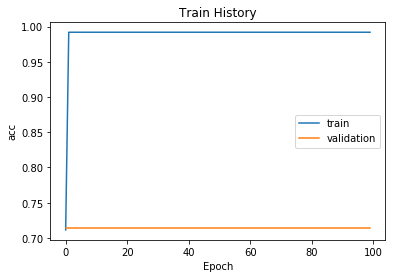

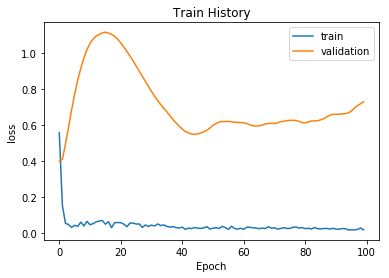

319/319 [==============================] - 0s 39us/step


accuracy= 0.9968652037617555


In [403]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() 
#输入层
model.add(Dense(units=200, 
                input_dim=25, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#隐藏层
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))
#输出层
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) 

model.compile(loss='binary_crossentropy',  
              optimizer='adam', metrics=['accuracy',getRecall])

train_history = model.fit(x = X_train_res, y = y_train_res.ravel(), 
                          validation_split=0.8, epochs=100, 
                          batch_size=500, verbose=2) 

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(X_test, y_test)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict_classes(X_test)


In [404]:
cnf_matrix_keras_tr = confusion_matrix(y_train, model.predict_classes(X_train))

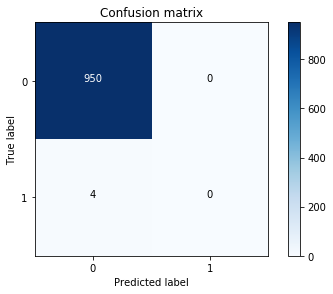

In [405]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_keras_tr , classes=class_names, title='Confusion matrix')
plt.show()

# GradientBoosting

## benchmark gradientboost

In [473]:
def plottestmatrix(model):
    cnf_matrix_ts = confusion_matrix(y_test, model.predict(X_test))
    plot_confusion_matrix(cnf_matrix_ts , classes=class_names, title='Test Confusion matrix')
def plottrainmatrix(model):
    cnf_matrix_tr = confusion_matrix(y_train, model.predict(X_train))
    plot_confusion_matrix(cnf_matrix_tr , classes=class_names, title='Train Confusion matrix')
def plotmatrix(model):
    cnf_matrix_res = confusion_matrix(y_train_res, model.predict(X_train_res))
    plot_confusion_matrix(cnf_matrix_res , classes=class_names, title='Re Confusion matrix')

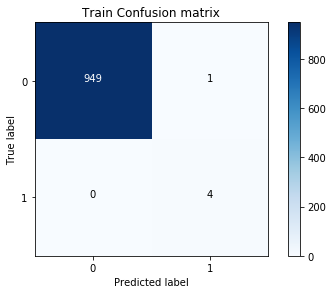

In [462]:
gbm0 = ensemble.GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train_res, y_train_res.ravel())
plottrainmatrix(gbm0)

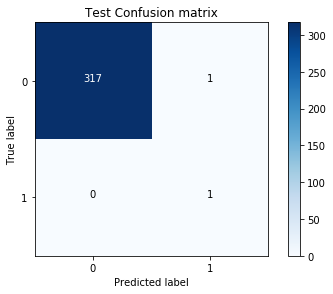

In [463]:
plottestmatrix(gbm0)

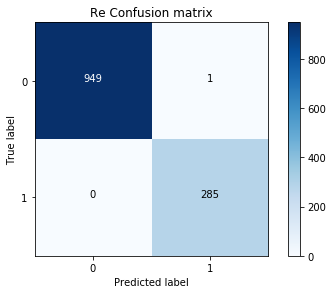

In [474]:
plotmatrix(gbm0)

> 调节 n_estimators
<br>
> 调节'max_depth'和'min_samples_split'
<br>
> 调节‘min_samples_leaf'和 'min_samples_split'
<br>
> 调节’max_features‘

In [492]:
gbc = ensemble.GradientBoostingClassifier(learning_rate=0.1)
param_grid= {
          "n_estimators": [int(i) for i in np.linspace(1,10,10)]
             }
clf_gbc = GridSearchCV(gbc, param_grid, cv=10, verbose=5,scoring='roc_auc')
clf_gbc.fit(X_train_res, y_train_res.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.9769509981851181, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ........................ n_estimators=1, score=1.0, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ........................ n_estimators=1, score=1.0, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.9998185117967332, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.9940108892921959, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ........................ n_estimators=1, score=1.0, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ......... n_estimators=4, score=0.9998185117967332, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ........................ n_estimators=4, score=1.0, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ........................ n_estimators=4, score=1.0, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ........................ n_estimators=4, score=1.0, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ........................ n_estimators=4, score=1.0, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ........................ n_estimators=4, score=1.0, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ........................ n_estimators=4, score=1.0, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

In [493]:
clf_gbc.best_params_

{'n_estimators': 8}

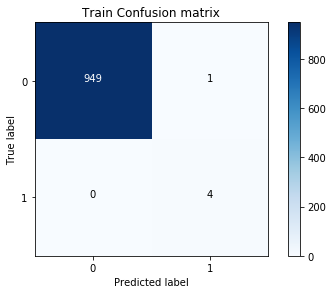

In [494]:
gbm1 = ensemble.GradientBoostingClassifier(n_estimators=8,learning_rate=0.1)
gbm1.fit(X_train_res, y_train_res.ravel())
plottrainmatrix(gbm1)

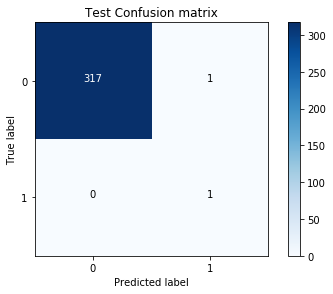

In [495]:
plottestmatrix(gbm1)

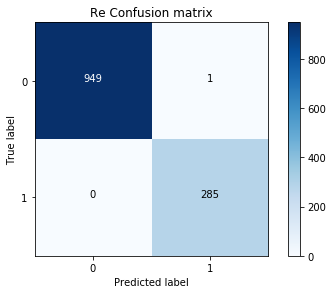

In [496]:
plotmatrix(gbm1)

In [497]:
param_test2 = {'max_depth':[1,2,3,4,5], 'min_samples_split':[int(i) for i in np.linspace(10,100,10)]}
clf_gbc_2 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=8, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='recall', cv=10,iid=False)
clf_gbc_2.fit(X_train_res, y_train_res.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [498]:
clf_gbc_2.best_params_

{'max_depth': 2, 'min_samples_split': 10}

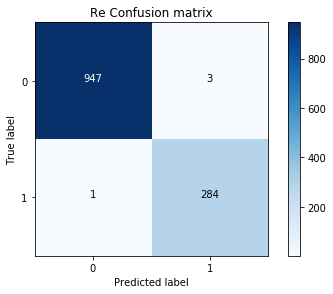

In [499]:
gbm2 = ensemble.GradientBoostingClassifier(n_estimators=8,learning_rate=0.1,max_depth=2,min_samples_split=10)
gbm2.fit(X_train_res, y_train_res.ravel())
plotmatrix(gbm2)

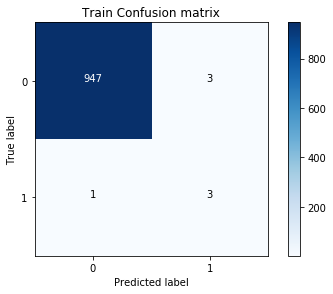

In [500]:
plottrainmatrix(gbm2)

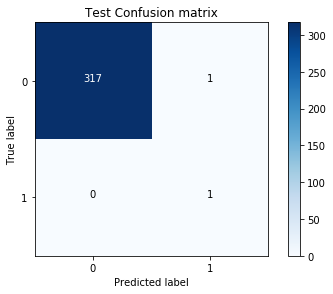

In [501]:
plottestmatrix(gbm2)

In [502]:
param_test3 = {'min_samples_split':[int(i) for i in np.linspace(100,800,8)], 'min_samples_leaf':[int(i) for i in np.linspace(1,10,10)]}
gsearch3 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=8,max_depth=2,
                                     max_features='sqrt', subsample=0.8, random_state=10, min_samples_split=10), 
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=10)
gsearch3.fit(X_train_res, y_train_res.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'min_samples_split': [100, 200, 300, 400, 500, 600, 700, 800], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [503]:
gsearch3.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 300}

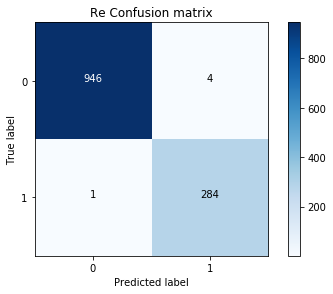

In [506]:
gbm3 = gsearch3.best_estimator_
gbm3.fit(X_train_res, y_train_res.ravel())
plotmatrix(gbm3)

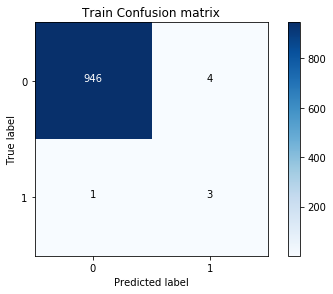

In [507]:
plottrainmatrix(gbm3)

In [510]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=10, subsample=0.8, verbose=0, warm_start=False), 
                       param_grid = param_test4, scoring='roc_auc',iid=False, cv=10)
gsearch4.fit(X_train_res, y_train_res.ravel())
gsearch4.best_params_

{'max_features': 7}

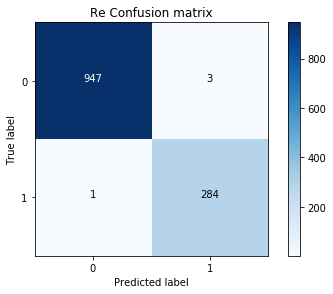

In [511]:
gbm4 = gsearch4.best_estimator_
gbm4.fit(X_train_res, y_train_res.ravel())
plotmatrix(gbm4)

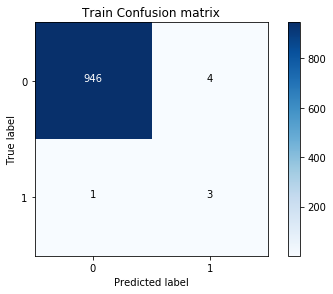

In [512]:
plottrainmatrix(gbm3)

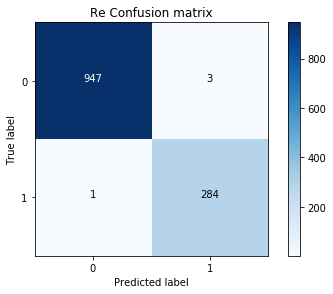

In [524]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = gsearch4.best_estimator_, 
                       param_grid = param_test5, scoring='recall',iid=False, cv=5)
gsearch5.fit(X_train_res, y_train_res.ravel())
gbm5 = gsearch5.best_estimator_
gbm5.fit(X_train_res, y_train_res.ravel())
plotmatrix(gbm5)

In [525]:
 gsearch4.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=10, subsample=0.8, verbose=0, warm_start=False)

## 调节learning_rate

在1到3的范围内调节learning_rate,由图可以知，当超过2时，模型能全部预测到异常，同时出现FP,随着learning_rate的增大，预测到的异常点越多，同时FP的数量也越多，当learning_rate到达2.5之后，FP的数目几乎和TP的数目相同了，由于通信公司不在意时间，想要预测到每一个异常，所以learning_rate最好大于2，小于2.5

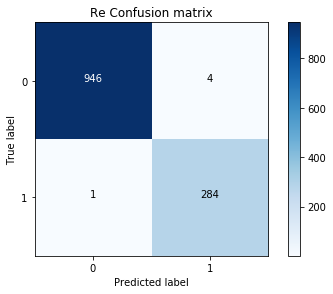

In [541]:
gbm5 = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=2,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=10, subsample=0.8, verbose=0, warm_start=False)
gbm5.fit(X_train_res, y_train_res.ravel())
plotmatrix(gbm5)

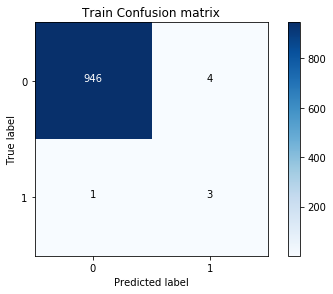

In [543]:
plottrainmatrix(gbm5)

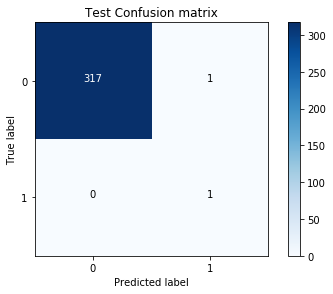

In [544]:
plottestmatrix(gbm5)

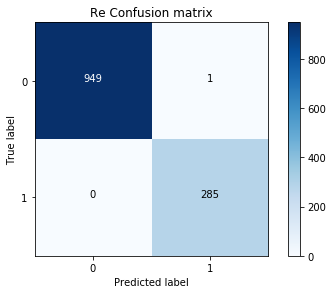

In [542]:
gbm6 = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=2, loss='deviance', max_depth=2,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=10, subsample=0.8, verbose=0, warm_start=False)
gbm6.fit(X_train_res, y_train_res.ravel())
plotmatrix(gbm6)

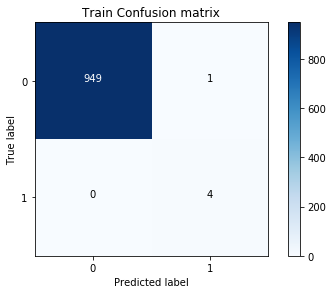

In [545]:
plottrainmatrix(gbm6)

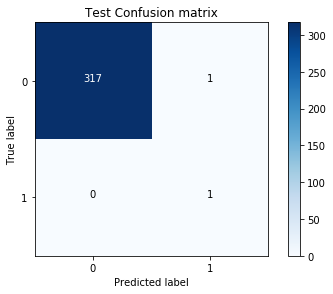

In [546]:
plottestmatrix(gbm6)

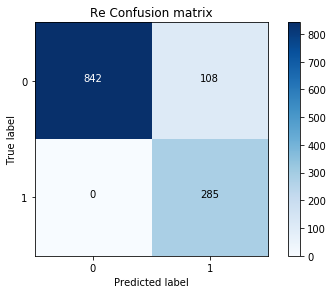

In [547]:
gbm7 = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=2.5, loss='deviance', max_depth=2,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=10, subsample=0.8, verbose=0, warm_start=False)
gbm7.fit(X_train_res, y_train_res.ravel())
plotmatrix(gbm7)

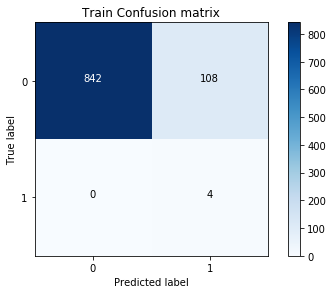

In [548]:
plottrainmatrix(gbm7)

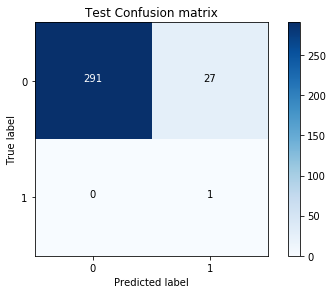

In [549]:
plottestmatrix(gbm7)

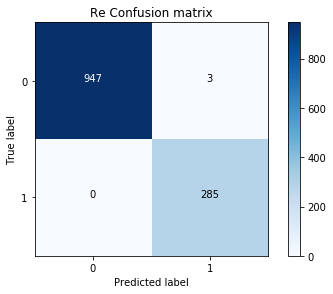

In [550]:
gbm8 = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=2.2, loss='deviance', max_depth=2,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=10, subsample=0.8, verbose=0, warm_start=False)
gbm8.fit(X_train_res, y_train_res.ravel())
plotmatrix(gbm8)

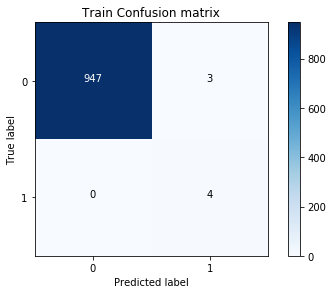

In [551]:
plottrainmatrix(gbm8)

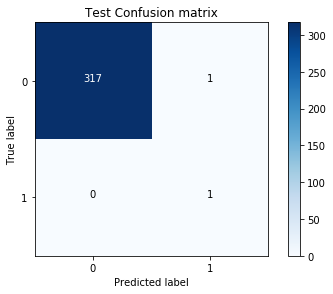

In [552]:
plottestmatrix(gbm8)